### Homework 02 Machine Learning - Pattern Recognition
    Department of Informatics and Telecommunications
    University of Athens

    Giorgos Pallikaris
    1115201400335

    24/5/2o22 - 5/6/ 2o22







**Brief:** This homework is based on (64) face pictures taken under various lightning conditions.
In order to run this  notebook you will have to download their containing directory from [here](https://drive.google.com/drive/folders/1N5wiBWaPXSc-9QzE_pG9CcOG95SDvN4Z?usp=sharing)
 and store them locally at relative path like with name :
 <br>
 */content/drive/My Drive/MachineLearning/HW2/faces/*  
<br><br>
[You can find homework announcement here.](https://drive.google.com/file/d/1_8LrHhe1NXanWMX2-AABkrlx4vxLpVAy/view?usp=sharing)
<br><br>
See results here to avoid running locally :
[Image Demonstration](https://drive.google.com/drive/folders/1wJz5tqf1wn4TnDLtyTZXFnf0yP1mjgNn?usp=sharing)

<br><br><br>



During implementation I have studied and learned :   

**1.] What is Logistic regression and how it can work.**

**2.] Overfiting /underfitting phenomenon , causes and ways to prevent.**

**3.] Ridge regression.**

**4.] Preproccessing face images in order to train and test a recognition software.**


**5.] Dimension reduction with P.C.A. and how is the data loss quantified.Examples for dim=9 and dim=30.**



**6.] Nearest Neighbor classification.**


**7.] Singular Value Decomposition.**

**8.] Data Reconstruction.**


**For 640 images = 10 persons:**

Time : <1 min

Space: <1.3MB


In [ ]:

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sys

import os
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance. Για κάθε  x υπολογίζεται το  Z=(x-u)/s
from sklearn.model_selection import train_test_split
from matplotlib import pylab


from numpy import asarray

from mpmath import mp

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#My Drive/ML/HW2/faces
facepath='/content/drive/My Drive/MachineLearning/HW2/faces/'


############# CONTROL BOX #################
preprocess_mod=str()
premoder =0
range1=(-10,1)

trainingsetname="Set_1"
###########################################


Mounted at /content/drive


# **Question 1**



A good way to imagine why $w^T$  could easily be tricked to cause overfitting is by seeing side by side the terms and parameters of $w^tx$.
The more $w_i$ you add with corresponding values ,you can maximize - almost absolutely- success on training instances since you create in essence a *"bollean mask"* of which variable gives >0.5 and which not exactly as you want it by giving very big or very small parameter values,relatively .<br>
**In essence** ,we can minimize the training error by sacrificing the **generalization gap**.<br>
Reqularization techniques could help  decrease the **generalization error** by estimating the best size for parameter $w$.<br>
  Sigmoid ()$: R -> [0,1] $ and is convex at $R^-$.
  Sigmoid () also applies a nonlinear transformation at x
  <br>
  with cost function:<br>lets say
  $l(w^*) +λC =1/N*Σ( y_i log(φ(y_i)) + (1-y_i)log(1-φ(y_i)) + whatever regularizer$


  φ is non linear so ridge regression is not of use.
  With **lasso regression** we have:<br>
  leastwithrespect to$ w_l(w^*)=1/N*Σ( y_i log(φ(y_i)) + (1-y_i)log(1-φ(y_i)) + λ||w||_1$<BR>
  this one i would choose,is solvable,stable and for properly sparse data may apply feature extraction.

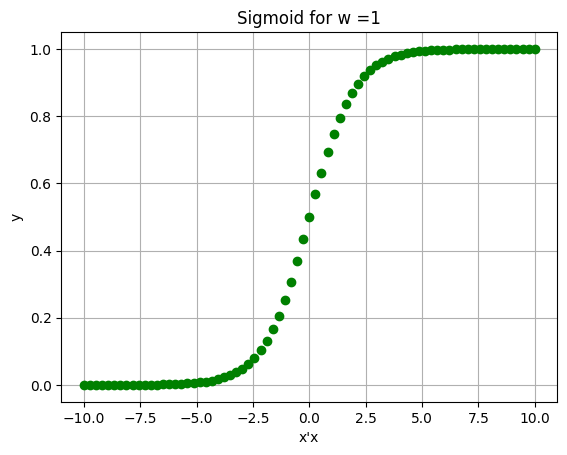

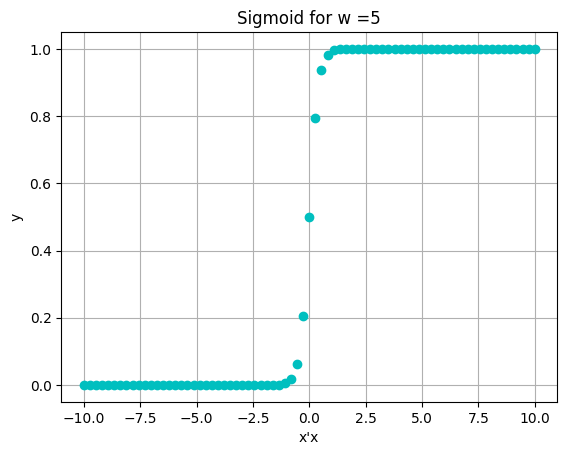

<ipython-input-2-85d1b8c926dd>:9: RuntimeWarning: overflow encountered in exp
  eefac=np.exp(-st)


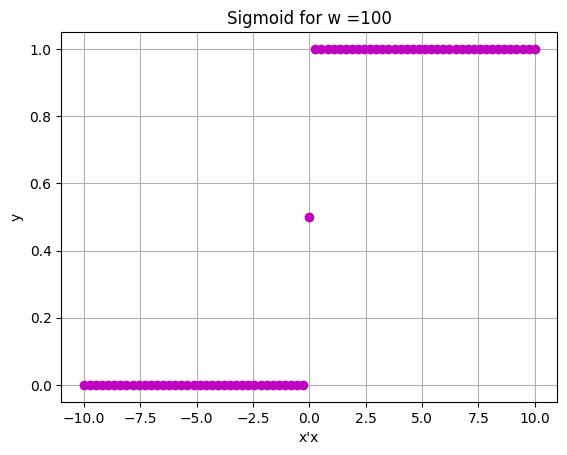

In [ ]:
from pylab import *
import pylab as plt


def lr_overft_sigmoidf(  x , w):
  st=w*x
  d=0
  try:
    eefac=np.exp(-st)
  except:
    d=+1

  eefac +=1.0

  rval=1/eefac


  return rval

wi=1
xs=plt.linspace(-10,10, 75)

plt.plot( xs, lr_overft_sigmoidf(xs,wi),'og')
plt.grid()
pylab.title("Sigmoid for w ="+str(wi))

plt.xlabel("x'x")
plt.ylabel("y")
plt.show()

wi=5
xs=plt.linspace(-10,10, 75)
plt.grid()
pylab.title("Sigmoid for w ="+str(wi))
plt.plot( xs, lr_overft_sigmoidf(xs,wi),'oc')
plt.xlabel("x'x")
plt.ylabel("y")
plt.show()

wi=100
xs=plt.linspace(-10,10, 75)
plt.grid()
pylab.title("Sigmoid for w ="+str(wi))
plt.plot( xs, lr_overft_sigmoidf(xs,wi),'om')
plt.xlabel("x'x")
plt.ylabel("y")
plt.show()

# **Question 2**


[question2] -> https://drive.google.com/file/d/1slagvlRaLA1d-0nTIWXj1ia6Rw7FHvxE/view?usp=sharing

<br><br>

*I used notes from National Technical University of Athens that cover the first half of my manuscripted answer.*



# **Question 3**



In [ ]:
import os
import os.path
from PIL import Image
import glob
import matplotlib.pyplot as plt

sets=  [[0,0], [1,7],[8,19],[20,31],[32,45],[46,64] ]




**Subquestion 3.1**

***Function loadImages( path ,"Set_i" ) returns an array where each image of Set_i is represented as a row vector,returns also  a list of labels that corresponds to the class of each image.Sets' limits are predifined above.***

In [ ]:

def settoStrset(first ,last):
  setend=list()
  for i in range ( first , last+1):
    if i < 10  :
      i = '0'+str(i)
    else:
      i = str(i)
    setend.append( i )
  return setend

def settostr( set_number):
  set_number=int ( set_number[-1])
  return settoStrset(sets[set_number][0], sets[set_number][1])


def loadImages( path , set_number ):



  imagenames=os.listdir(facepath)
  wantedimages=settostr(set_number)


  imageList=list()
  labelList=list()
  for i in imagenames:
    temp=i[9]+i[10]
    if temp in wantedimages:
      imageList.append(path+i)

      t=i[6]+i[7]
      t=int(t)
      labelList.append (t)


  data=list()
  for i in imageList:
    actualImage=Image.open(i)
    npimg=np.asarray(actualImage)
    npimg=np.reshape(npimg,-1)
    data.append(npimg)

  traindata=np.array(data)
  return traindata,labelList

#(p,x)=loadImages( facepath,"Set_1")


 ***Preprocessing***

In [ ]:


#our data are not that sparse at all in this problem
#that can be seen in the values of the pixels


def cleaner ( dataset):

  exscalingmetrics=preprocessing.StandardScaler().fit(dataset)
  cleanedTrainData=exscalingmetrics.transform(dataset)


  return cleanedTrainData


def rangecleaner(dataset,rng=(0,1)):

  rangesclmetrics=preprocessing.MinMaxScaler(rng)
  cleaned=cleaner(dataset)
  rangedcleaned=rangesclmetrics.fit_transform(cleaned)
  return rangedcleaned

def ranged (dataset,rng=(0,1)):
  rangemetrics=preprocessing.MinMaxScaler(rng)
  rangedset=rangemetrics.fit_transform(dataset)
  return rangedset



def preproc( dataset , premode=premoder,rng=range1):
  global preprocess_mod
  if premode == 0:
    preprocess_mod="Standard Scaler"
    return cleaner(dataset)
  if premode == 1:
    preprocess_mod="Standard Scaler | MinMaxScaler at range"+str(rng)
    return rangecleaner(dataset,rng)
  if premode == 2:
    preprocess_mod="MinMaxScaler at range"+str(rng)
    return ranged(dataset,rng)



***Preprocess control***


*Here we can use previously defined preprocessing combinations and re run the code below to investigate possible changes with the help of our diagrams and plots.Thus we can extract a specified conclusion on what works best in our data.*

*Since we have plenty of time and our project is relatively small as a matter of computational time and  resources , we can also use  **cross validation** to understand even further our supposed unknown **and** unbiased data seed.*

In [ ]:
trainset,trainlabels=loadImages(facepath,trainingsetname)
#scaledtrainset=cleaner(trainset)
#rangedscaledtrainset=rangecleaner(trainset,(-1,1))

#trainX=trainset
trainX= preproc( trainset)


**Subquestion 3.2...**

***PCA***
<br>
*Visualised metrics and  first inspection in our model. Decision on components number.*

*Initially we will inspect the cummulative summary of the explained variance from the first to  the maximum number of components by the use of Principal Components Analysis ( PCA).Through our plots and diagrams we will choose the best number of components,while not forgetting  our exercice's target ,to run the 2 lower dimensions  NN classification  ,d1 will be 9 and d2->30.*  

[0.45324844 0.11948123 0.09691372 0.06700585 0.05023817 0.04247898
 0.0323789  0.02455728 0.02150158 0.01873248]



    Basic scaling preprocessing feeding  PCA     :

Cumulative variance we catch with  1 principal components is  0.45324844305501727
Cumulative variance we catch with  2 principal components is  0.5727296751852842
Cumulative variance we catch with  3 principal components is  0.6696433957259146
Cumulative variance we catch with  4 principal components is  0.7366492421566668
Cumulative variance we catch with  5 principal components is  0.7868874110929696
Cumulative variance we catch with  6 principal components is  0.8293663890806932
Cumulative variance we catch with  7 principal components is  0.8617452921292631
Cumulative variance we catch with  8 principal components is  0.8863025672124543
Cumulative variance we catch with  9 principal components is  0.9078041448435961
 ********* DIN     *************DIN****************     DIN ***************    
 we are good with  10 

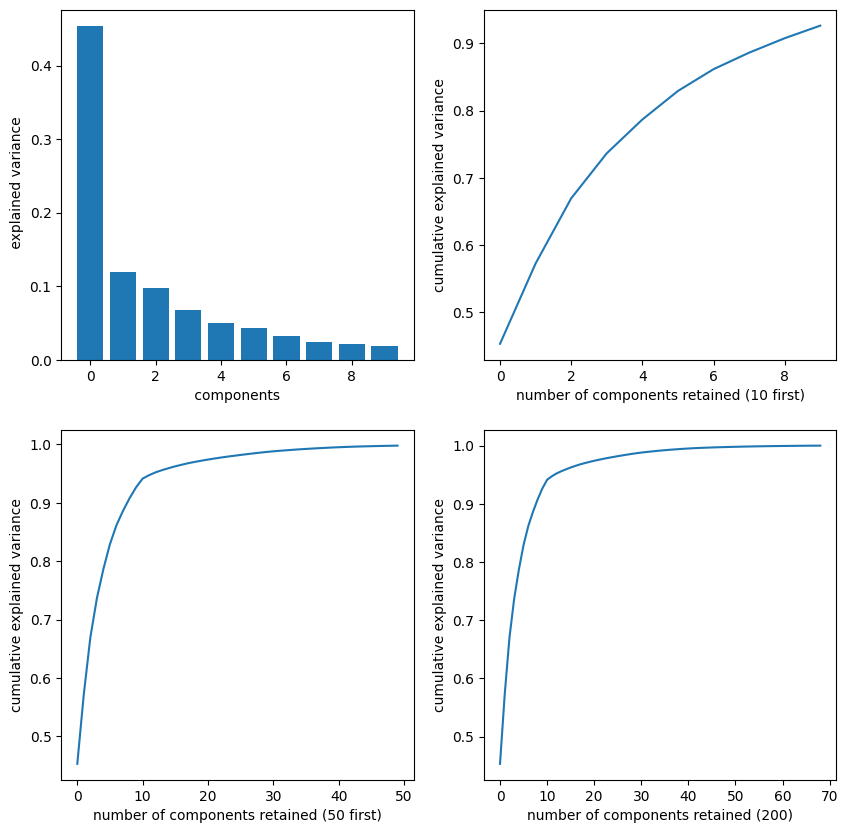


 We can see that we get a minor upward change  by trying the rest preprocessing methods
 Such a change could be easily depend to noise or just content and -probably- will have not any actual difference.
 I am also going to check it at later instances of our problem.

 Cumulative variance we catch with  10 principal components is  0.9296336650019881     with minmax grading at range [-1, 1] after scaling 
 Cumulative variance we catch with  10 principal components is  0.9265366280144322     with basic scaling   ... Slight change at 3rd decimal digit!!


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import math


n_components= 69

pca =PCA (n_components=n_components,whiten=True ).fit(trainX)

#components = pca.transform(trainX)

print (pca.explained_variance_ratio_[:10])
cumExplainedVar=np.cumsum(pca.explained_variance_ratio_)
print (    "\n\n\n    Basic scaling preprocessing feeding  PCA     :\n")
light=True
for i in range ( n_components):
  if cumExplainedVar[i] > 0.91731 and light:
    print ( " ********* DIN     *************DIN****************     DIN ***************    \n we are good with ", i+1, " components \n ....furthermore ..[Barsi and Jacobs, IEEE T-PAMI, 2003]")
    light= False
  print ( "Cumulative variance we catch with ", i+1 ,"principal components is ", cumExplainedVar[i])
plt.figure(figsize=(10, 10))
numOfComp=10
plt.subplot(2, 2, 1)
plt.bar(range(numOfComp),pca.explained_variance_ratio_[:numOfComp])
plt.xlabel(' components ')
plt.ylabel(' explained variance');


plt.subplot(2, 2, 2)
plt.plot(cumExplainedVar[:10])
plt.xlabel('number of components retained (10 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 3)
plt.plot(cumExplainedVar[:50])
plt.xlabel('number of components retained (50 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 4)
plt.plot(cumExplainedVar)
plt.xlabel('number of components retained (200)')
plt.ylabel('cumulative explained variance');

plt.show()

print ( "\n We can see that we get a minor upward change  by trying the rest preprocessing methods")
print ( " Such a change could be easily depend to noise or just content and -probably- will have not any actual difference.")
print ( " I am also going to check it at later instances of our problem.")

print ("\n Cumulative variance we catch with  10 principal components is  0.9296336650019881     with minmax grading at range [-1, 1] after scaling ")
print ( " Cumulative variance we catch with  10 principal components is  0.9265366280144322     with basic scaling   ... Slight change at 3rd decimal digit!!")


  **Note 1**


As we can see  Barsi and Jacobs are quite right.At 9th or 10th principal component we see that our cummulative sum of explained variance is over 90%.
When our model can "promise" this, it may be more beneficial to review preprocessing,regularization techniques,model choice , instead of using more components.

It is natural for  principal components of faces' dataset to "swim" around these dimensions no matter how big the initial ones are.



*See [Barsi and Jacobs, IEEE T-PAMI, 2003]*



<br><br><br><br>
**Subquestion 3.3**

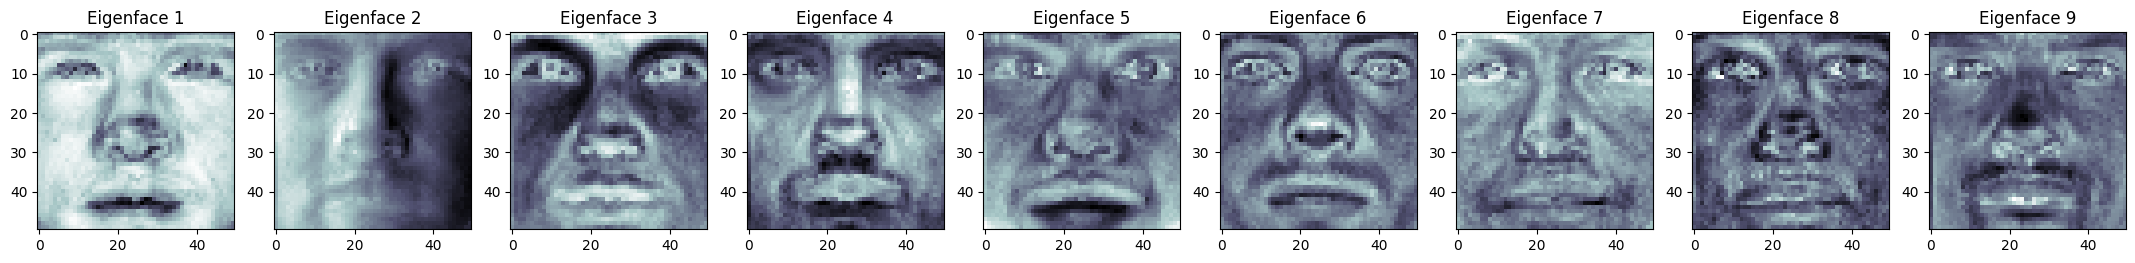

In [ ]:


xx=plt.figure (figsize = ( 30 , 21))
for i in range ( 0,9 ,1):

  x=plt.subplot ( 1,10 , i+1)
  plt.gca().set_title('Eigenface '+str(i+1))
  plt.imshow ( pca.components_[i].reshape ( 50 , 50 ), cmap='bone')


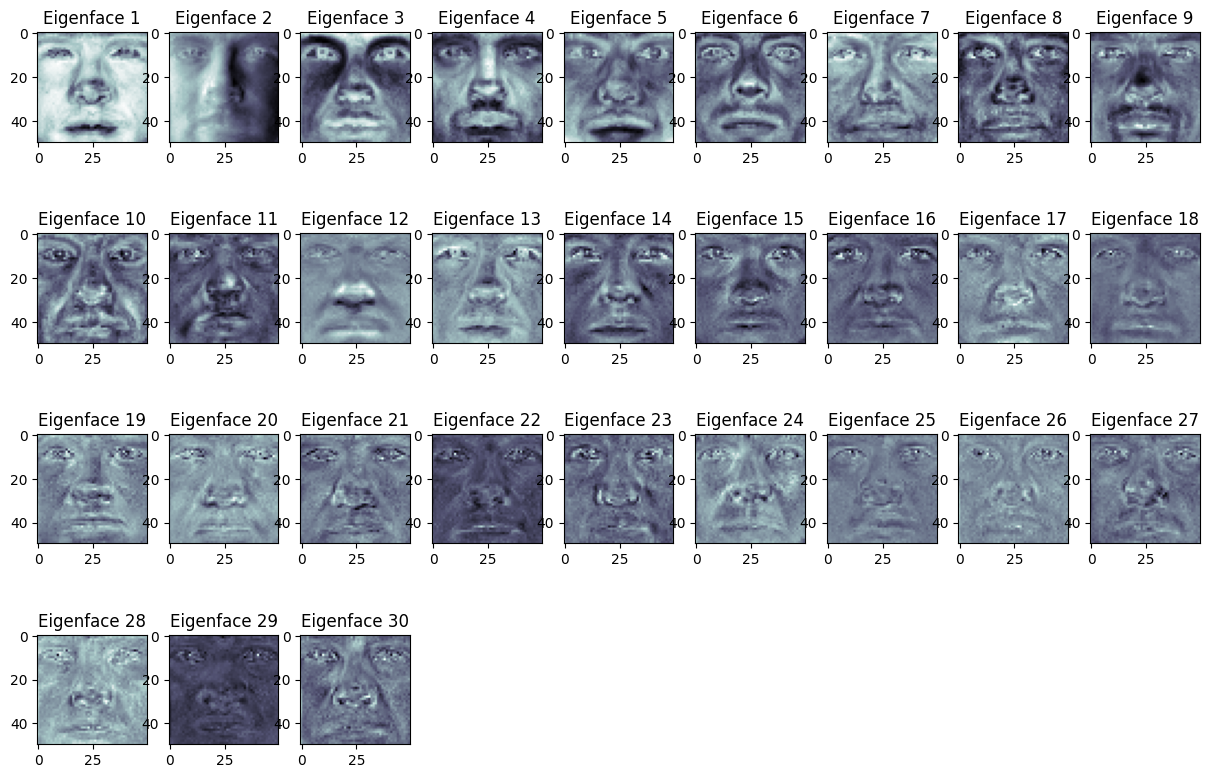

In [ ]:
plt.figure (figsize = ( 15 , 10))
for i in range (0,30,1):
  plt.subplot ( 4,9 , i+1)
  plt.gca().set_title('Eigenface '+str(i+1))
  plt.imshow ( pca.components_[i].reshape ( 50 , 50 ), cmap='bone')

Time for thinking!Let's imagine our photos as a row vector.From this view we can expect that eyes cheekbones mouths etc. will almost "land" at the same columns of this vector.Thus we are waiting to see differences in relation of these face areas at the Eigenfaces.
Eigenfaces will be the reconstructions of our eigenvectors , or else, ***the set of simple patternized projections of the  gradual importance of the features*** at the initial dimension.

 Since the Yale b set is an already choosed set with proper cropping and almost visually centered pictures it is inevitable that our Eigenfaces will express importance of features as a combinations of light intensity,lighting angle ,depth(shadows) which are features of the photos **and** nose,eyes,mouth ,beard physical dimensions of the subjects.
 The importance distribution i guess that would slide to the physical characteristics if the dataset would be way bigger or spontaneous- unpresetted .Since lighting angle or light intensity would be less important to describe our subjects.At the same time ,such characteristics are quite important at pre setted captures that are also choosed specifically,like ours.

**Subquestion 3.2**
<br>
<br>
***projection and reconstruction***

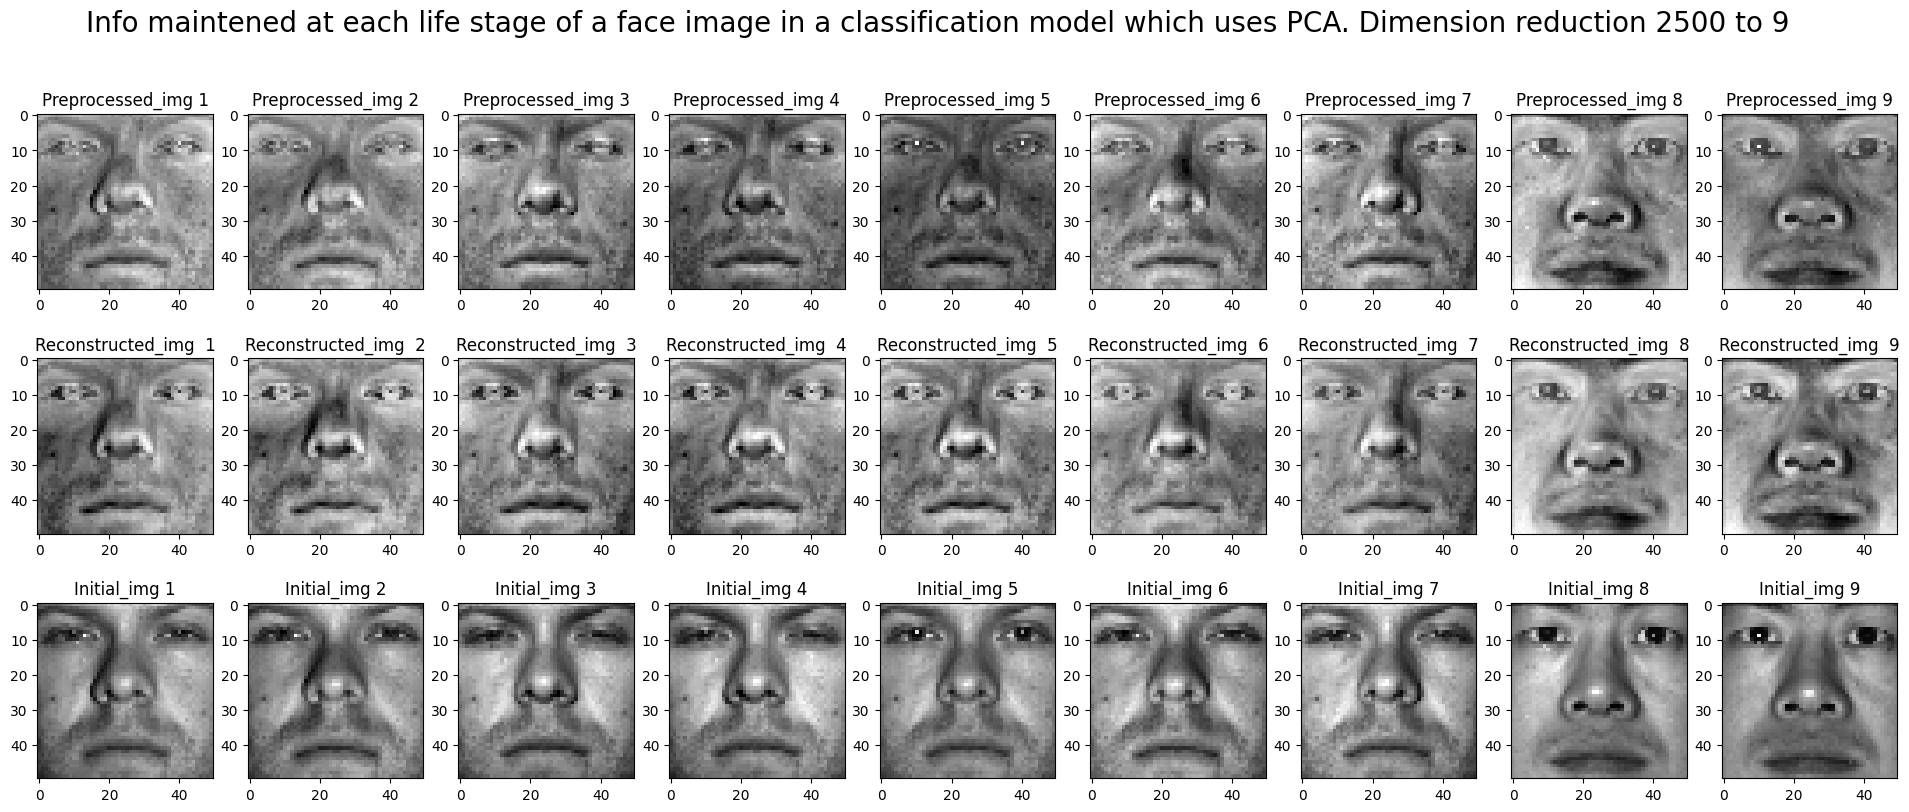

In [ ]:
from operator import le

# we repeat the process for each test set


# representation as an nparray
testsets=list()
testlabels=list()

for stnm in range (1,6):
  testset,testlabel=loadImages(facepath,"Set_"+str(stnm))
  testsets.append(testset)
  testlabels.append(testlabel)

#preprocessing
testYs=list()

for i in range ( len(testsets)):
 tousr=preproc(testsets[i])
 testYs.append(tousr)

#Feature extraction

testprojections=list()

redim=9

pca=PCA(n_components=redim , whiten=True).fit(trainX)

# from 2500 to eigenspace of 9 dimensions
dim9projection=pca.transform(trainX)
for i in range ( len (testYs)):
  tstprj=pca.transform(testYs[i])
  testprojections.append(tstprj)


#from eigen space to "simplified" 2500
dim9reconstruction=pca.inverse_transform(dim9projection)




plt.figure(figsize=(24, 9))

for i in range(0,redim,1):

  plt.subplot(3, redim, i+1)
  plt.gca().set_title('Preprocessed_img '+str(i+1))
  plt.imshow(trainX[i].reshape(50, 50), cmap='binary_r')

  plt.suptitle('Info maintened at each life stage of a face image in a classification model which uses PCA. Dimension reduction 2500 to 9', fontsize=20)

  plt.subplot(3, redim, i+1+redim)
  plt.gca().set_title('Reconstructed_img  '+str(i+1))
  plt.imshow(dim9reconstruction[i].reshape(50, 50), cmap='binary_r')

  plt.subplot(3, redim, 1+i+2*redim)
  plt.gca().set_title('Initial_img '+str(i+1))
  plt.imshow(trainset[i].reshape(50, 50), cmap='binary_r')



**Nearest Neighbor  : training and testing**

Function **findNearest( test , arr,tr_labels)** estimates the class of a new observation x' by finding the closest neighbor x_i to it and naming x's class by the class of x_i.There are various metrics to define closest.I will use euclidean distance. First argument is the new observation and second one is the array dataset used for training.
<br><br><br><br>

***For d=9 :***

In [ ]:

def euclideanDistance(vector1, vector2):
  distance = 0.0
  length=len(vector1)
  #print ("length=",length)
  for i in range(length):
    #print (i)
    distance += np.square(vector1[i] - vector2[i])
  return np.sqrt(distance)



def findNearest(test,arr,labels):
  firstLoop=True
  ctr=0
  for aRow in arr:  ## for each element in training set
    distance = euclideanDistance(test, aRow) ##find the distance from the new
    if not firstLoop:
      if distance<minDist:
        nearest=aRow
        minDist=distance ## keep the nearest training set element
        guessclass=labels[ctr]
    else:
      minDist=distance
      nearest=aRow
      guessclass=labels[ctr]
      firstLoop=False
    ctr+=1
  return minDist,nearest,guessclass

def diNearestNeighbor( testproj , dimprojection,componum):

  print ( " Training in",componum,"-d space.  Model :  Nearest Neighbor ")
  total=0.0
  ttlctr=0.0
  distsum=0
  wholesum=0

  for k in range ( len (testproj)):
    seta=testproj[k]
    set_size=len(seta)
    successGuessCounter=0.0
    checker = testlabels[k]
    for i in range(set_size):
      dist,the_closest,guess=findNearest(seta[i],dimprojection,trainlabels)
      if( guess== checker[i]):
        successGuessCounter+=1

    if k>0:
      distsum+=dist
      total+=set_size
      ttlctr+=successGuessCounter
    rto=successGuessCounter/float(set_size)
    rto*=100
    print ("Succesfoul ratio for Set_",k +1, " =",format(rto,".2f"), "% ")

  rto=ttlctr/float(total)
  rto*=100
  avgclcompo=distsum/( float(total)* componum)
  print ("\nd=",componum,"\nAverage score -excluding training set- =",format(rto,".2f"), "% \n preprocess mode was ",preprocess_mod)
  print ( " Average closest distance / No. of components  -excluding training set-   =",format(avgclcompo,".7f"))
diNearestNeighbor(testprojections,dim9projection,redim)

 Training in 9 -d space.  Model :  Nearest Neighbor 
Succesfoul ratio for Set_ 1  = 100.00 % 
Succesfoul ratio for Set_ 2  = 96.67 % 
Succesfoul ratio for Set_ 3  = 83.33 % 
Succesfoul ratio for Set_ 4  = 41.43 % 
Succesfoul ratio for Set_ 5  = 24.21 % 

d= 9 
Average score -excluding training set- = 56.14 % 
 preprocess mode was  Standard Scaler
 Average closest distance / No. of components  -excluding training set-   = 0.0014685


***..and now for d =30  :***

In [ ]:

testprojectios=list()

redimer=30

pca=PCA(n_components=redimer, whiten=True).fit(trainX)

# from 2500 to eigenspace of 9 dimensions
dim30projection=pca.transform(trainX)
for i in range ( len (testYs)):
  tstprj=pca.transform(testYs[i])
  testprojectios.append(tstprj)


#from eigen space to "simplified" 2500
#dim9reconstruction=pca.inverse_transform(dim9projection)

diNearestNeighbor(testprojectios,dim30projection,redimer)


 Training in 30 -d space.  Model :  Nearest Neighbor 
Succesfoul ratio for Set_ 1  = 100.00 % 
Succesfoul ratio for Set_ 2  = 98.33 % 
Succesfoul ratio for Set_ 3  = 99.17 % 
Succesfoul ratio for Set_ 4  = 83.57 % 
Succesfoul ratio for Set_ 5  = 50.53 % 

d= 30 
Average score -excluding training set- = 78.95 % 
 preprocess mode was  Standard Scaler
 Average closest distance / No. of components  -excluding training set-   = 0.0012668


**Subquestion 3.2...**
<br><br> ***comments and conclusions  for testing with d=9 ,d=30***

*Standard scaler:*<br>
d=9   Average score -excluding training set- = 60.94 %<br>
d= 30 Average score -excluding training set- = 81.41 %


Standard Scaler | MinMaxScaler at range(-0.5, 0.5):<br>
d=9   Average score -excluding training set- = 49.12 %<br>
d= 30 Average score -excluding training set- = 71.58 %

<br>
<br>

Generilization percentage is increased as number of components increase.
Why this is obvious?

The eigenvectors of a pca define an orthonormal set of vectors which is a linear base of a dimension,usually smaller than the one of the data.
Lets say d1 and d2 are 2 of these ,reduced dimensions.
With dmax = min ( number of rows, number of columns of the dataset) while usually it has no essence to use pca with more components than the number of the instances/observations,it is still possible with some arrangements.

So d1< d2 < dmax<= d. and suppose rank of the initial dataset is close to d as usuall.

While trying to describe a vector of d with d1 its absolute fact that we are going to lose some info i1 much bigger than i2 from d2 to d.
That is because the components that d2 has and d1 has not, describe at least some features usefoul for some (if not all) classifications.If we suppose that all observations come from the same and unknown seed.

Also about the sparsity:<br>
d=9  Average closest distance / No. of components  -excluding training set-   = = 0.0015749...

d=30 Average closest distance / No. of components  -excluding training set-   = 0.0012174 ...

**BOOM !**  <br>

Seems like we have an index that mirrors No. of components/generilized efficiency ratio ,and as a result the **empirical risk**.
Of course this is a false correlation but seems nicely fittable to our small instanced dataset.

<br><br><br>
**Reasons of different generalization factors between sets: <br><br>**
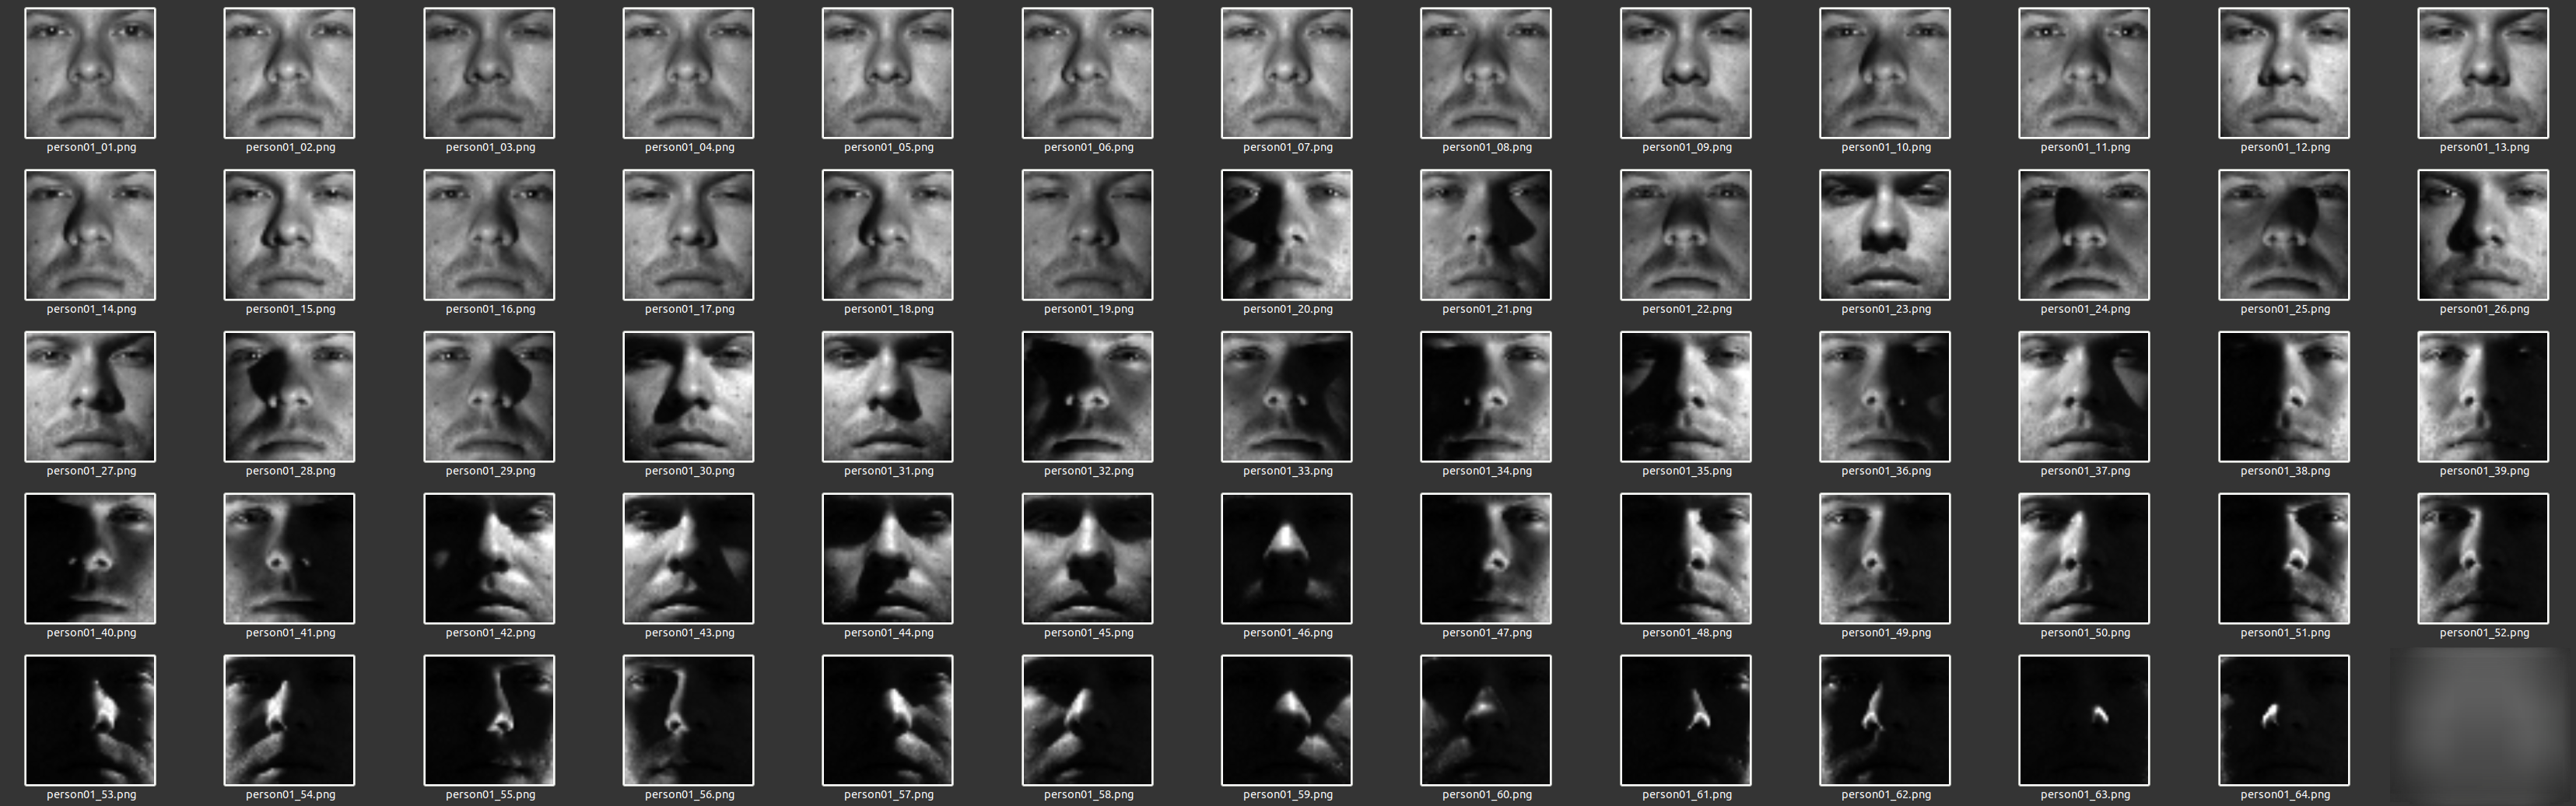


As we see above,<br>
**Visible features** of Set_1 are pretty much same with those of Set_2 a bit less with those of Set_3 and pretty far from the features of the last 2 sets.**This fact is directly mirrored at our success ratio for each set,since Set_1 is used for training**.<br>
It is safe expect that with a **cross calidation** method Set_3 would be the chosen one, as it is visually close to both first pair  and  last pair of sets. Set_4 and _5 would have a good success to each other ,but probably , results to the rest sets would be dissapointing for Set_5.

<br>
Since PCA is capturing these visible facts , Note 1 is empirically verified.

**Subquestion 3.4**

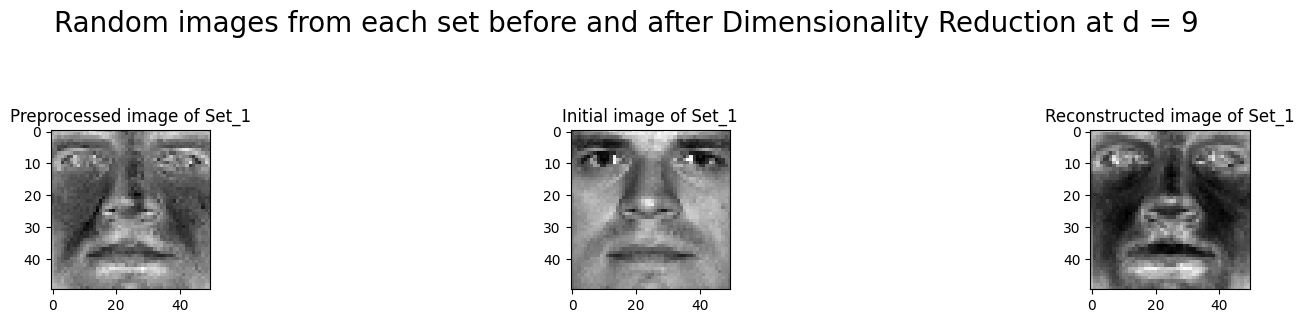

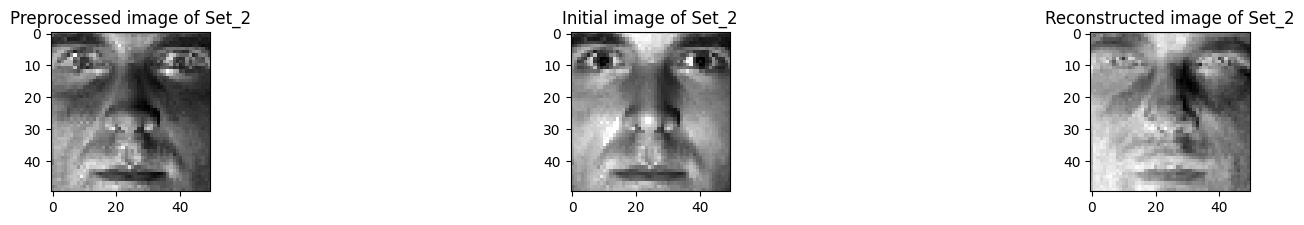

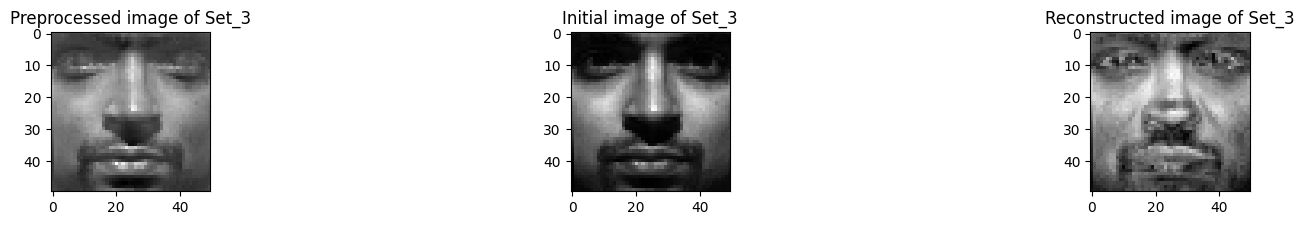

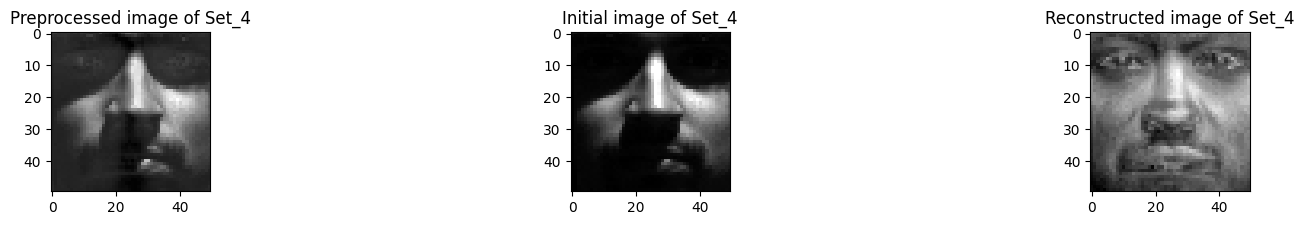

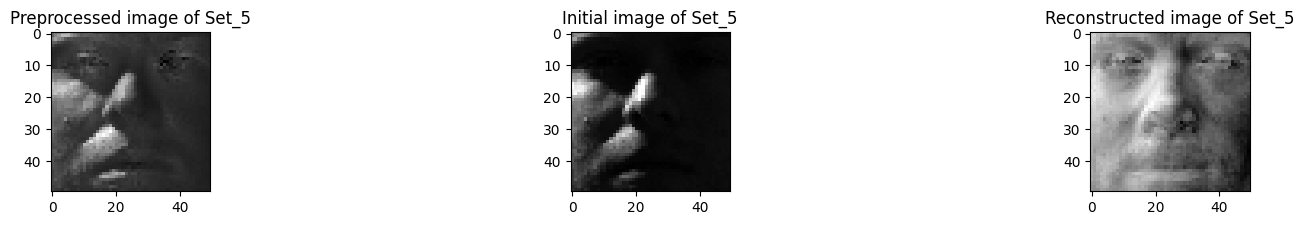

In [ ]:
import random
from random import randrange

testprojections=[]

redim=9

pca=PCA(n_components=redim , whiten=True).fit(trainX)

verxiscomponents=pca.components_

# from 2500 to eigenspace of 9 dimensions
dim9projection=pca.transform(trainX)
for i in range ( len (testYs)):
  tstprj=pca.transform(testYs[i])
  testprojections.append(tstprj)




i=0
for settt in testYs  :
  plt.figure(figsize=(19, 12))
  if i==0:
    plt.suptitle('Random images from each set before and after Dimensionality Reduction at d = '+str(redim), fontsize=20)
  rander=random.randint(0,len(settt)-1)
  recorn=pca.inverse_transform(testprojections[i][rander])
  prepr=settt[rander]
  initial=testsets[i][rander]
  l=1

  plt.subplot(5,3,l )
  plt.gca().set_title('Preprocessed image of Set_'+str(i+1))
  plt.imshow(prepr.reshape(50,50), cmap='binary_r')
  l+=1
  plt.subplot(5,3, l)
  plt.gca().set_title('Initial image of Set_'+str(i+1))
  plt.imshow(initial.reshape(50,50), cmap='binary_r')
  l+=1
  plt.subplot(5,3, l)
  plt.gca().set_title('Reconstructed image of Set_'+str(i+1))
  plt.imshow(recorn.reshape(50,50), cmap='binary_r')
  i+=1


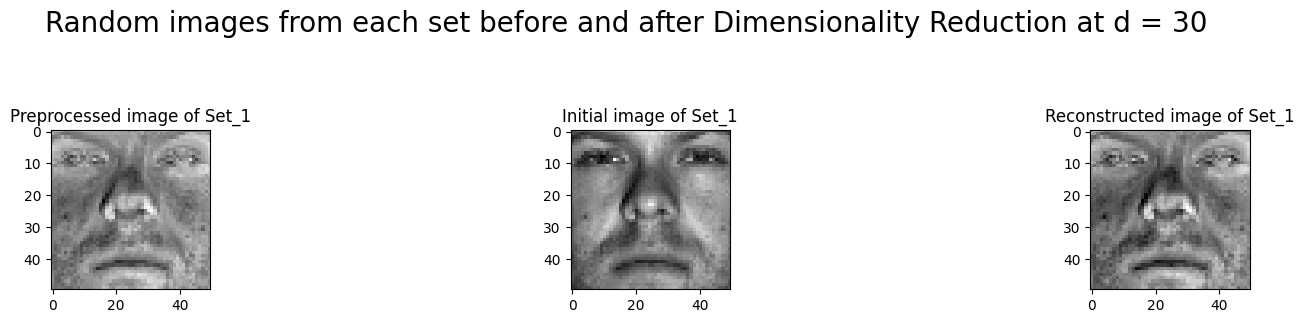

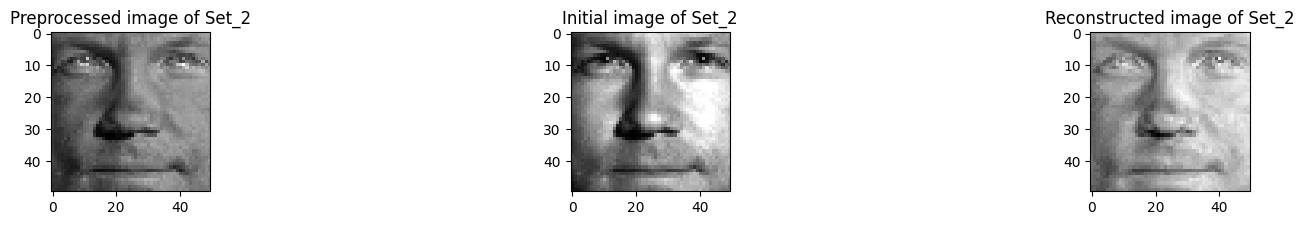

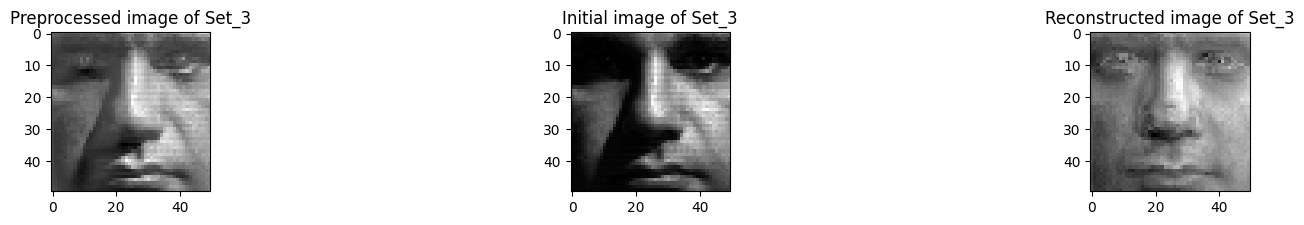

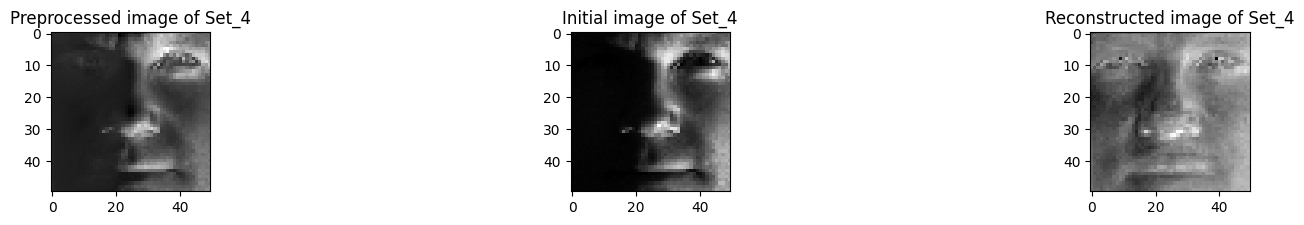

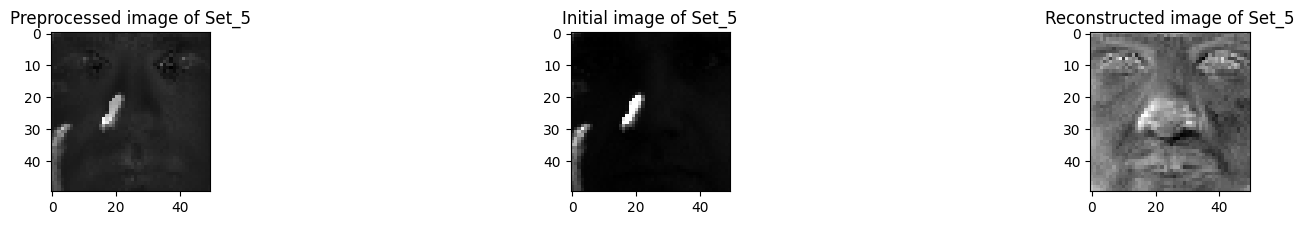

In [ ]:
testprojections=[]

redim=30

pca=PCA(n_components=redim , whiten=True).fit(trainX)

# from 2500 to eigenspace of 9 dimensions
dim30projection=pca.transform(trainX)
for i in range ( len (testYs)):
  tstprj=pca.transform(testYs[i])
  testprojections.append(tstprj)



i=0

for settt in testYs  :
  plt.figure(figsize=(19, 12))
  if i==0:
    plt.suptitle('Random images from each set before and after Dimensionality Reduction at d = '+str(redim), fontsize=20)
  rander=random.randint(0,len(settt))
  recorn=pca.inverse_transform(testprojections[i][rander])
  prepr=settt[rander]
  initial=testsets[i][rander]
  l=1
  plt.subplot(5,3,l )
  plt.gca().set_title('Preprocessed image of Set_'+str(i+1))
  plt.imshow(prepr.reshape(50,50), cmap='binary_r')
  l+=1
  plt.subplot(5,3, l)
  plt.gca().set_title('Initial image of Set_'+str(i+1))
  plt.imshow(initial.reshape(50,50), cmap='binary_r')
  l+=1
  plt.subplot(5,3, l)
  plt.gca().set_title('Reconstructed image of Set_'+str(i+1))
  plt.imshow(recorn.reshape(50,50), cmap='binary_r')
  i+=1


**Expiremental results explanation:**<br>

Reconstructed images from d=30 have better quality than those of d=30.
That is because of the more information captured with 30 principal components than 9.Since these components define an orthonormal base each one makes its' appearance ,some more than others.<br>Intensities-**weights** of their appearance are the eigenvalues and  - by definition - are decreasing.<br>
Thus the average ~10% better quality we may say ,makes a difference in our eyes but **is not proportional** to the absolute increase of components for sets 1, 2 and 3.
<br><br>
For sets 4 and 5 the impact is visible and the only reason is,( as mentioned above), the great initial difference with the images of the training set 1, we need more components to describe them,those that majorly exist in 4 and 5 but have minor roles in the training set images.
Of course that applies to the rest components also, 31-70,which engulf more info about every set ,especially the last 2.<br>
In any case,the absolute "enlightening" metrics are mentioned at **section 3.2**

**Subquestion 3.5**

*Singular Vectors versus Eigenvectors of sklearn*

(70, 70) (70,) (2500, 2500)
average of  1 =   eigv: 0.01913442277500959      ...  sv : -0.019134422775039128
 difference  1 ==  0.03826884555004872 

average of  2 =   eigv: 0.00019260659630504783      ...  sv : 0.0001926066025139462
 difference  2 ==  6.208898385663339e-12 

average of  3 =   eigv: 0.0011521711612229339      ...  sv : 0.001152171157366734
 difference  3 ==  3.856199864635257e-12 

average of  4 =   eigv: -0.0015525499570145946      ...  sv : -0.00155255013233346
 difference  4 ==  1.7531886532806684e-10 

average of  5 =   eigv: -0.0010982333803946417      ...  sv : 0.001098233410360349
 difference  5 ==  0.002196466790754991 

average of  6 =   eigv: 0.00024548252990978645      ...  sv : -0.00024548286813649476
 difference  6 ==  0.0004909653980462812 

average of  7 =   eigv: -0.0008672201300080637      ...  sv : -0.0008672210553392802
 difference  7 ==  9.253312164897096e-10 

average of  8 =   eigv: 0.0003000174744280496      ...  sv : 0.0003000195778679078
 diffe

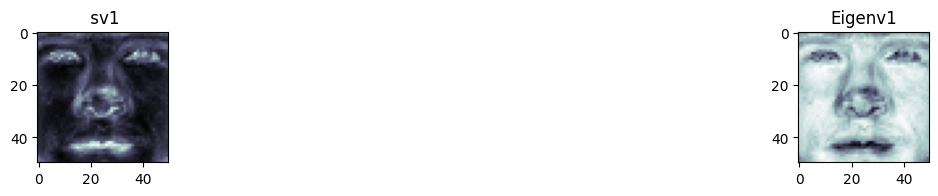

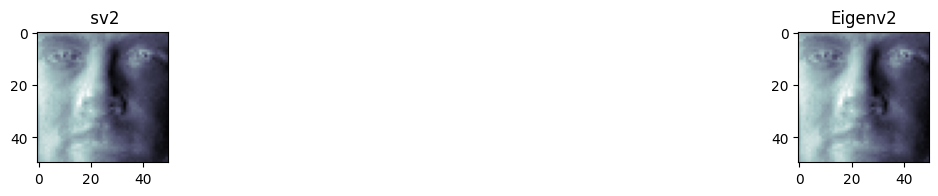

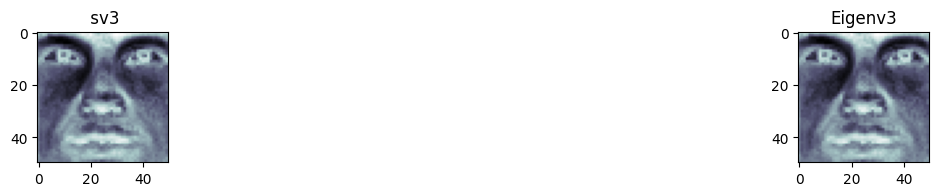

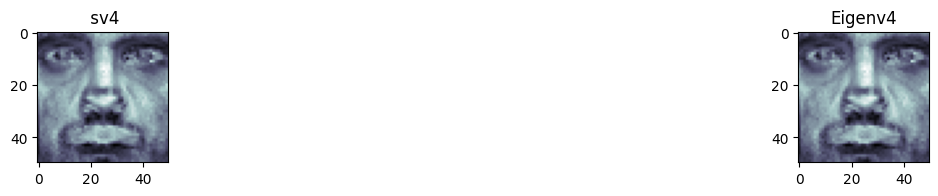

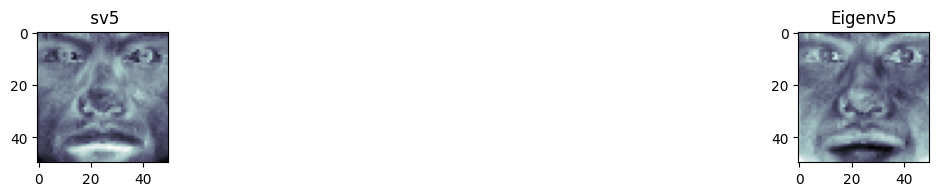

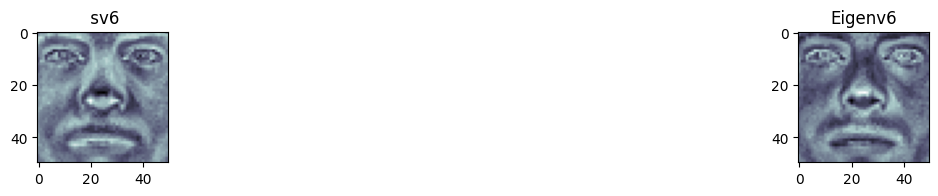

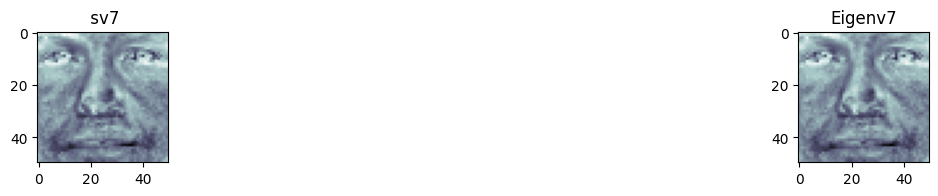

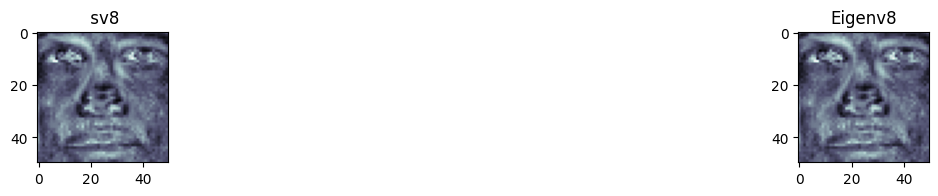

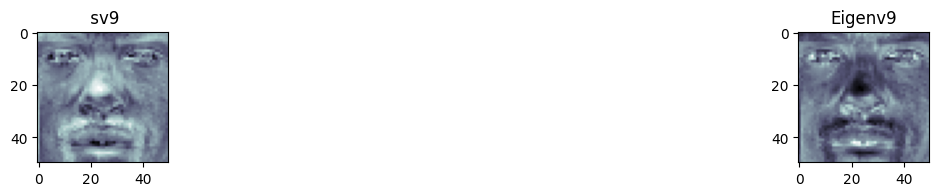

In [ ]:
U,sc,V=np.linalg.svd(trainX)

print ( U.shape , sc.shape , V.shape)

diff=[]
for i in range ( 0,9):
  hey=np.average(verxiscomponents[i])
  hop=np.average(V[i])
  diff.append(abs(hey-hop))
  print ("average of " , i+1,"=   eigv:",hey,"     ...  sv :",hop)
  print( " difference ",i+1,"== ",diff[i],"\n" )

rr=np.linalg.matrix_rank(trainX,[0.000001,False])

print (" average difference = ",format(np.average(diff),".5f"),"...\n")
print ("Linear indepedence rank of our preprocessed array equals ",rr[1])
l=1
for i in range (0,9):
  recorn=V[i]
  plt.figure(figsize=(18 , 18))

  plt.subplot(9,2,l)
  l+=1
  plt.gca().set_title(' sv'+str(i+1))
  plt.imshow(recorn.reshape(50,50), cmap='bone')


  plt.subplot(9,2 ,l)
  l+=1
  plt.gca().set_title('Eigenv'+str(i+1))
  plt.imshow(verxiscomponents[i].reshape(50, 50), cmap='bone')




Each column of the right  singular vector matrix (Vtranspose), is the S.V.D. representative of Eigenvector (PCA),<br>
is the "time-serie" ,an  orientation componenent of the changing
flow of each image, if we consider as "changing"<br>
the  view of the images at the same sequence we read them....
<br>
<br>
It was expected, to see a minor -undefined in absolute value change- between the singular vectors and the Eigenvectors.
<br>
Quantifying it , we see average difference =  0.00079 ... for set_1 training and a bit bigger for the rest sets because of their<br> more symmetrical images thus smaller linear indepedence(**?!**).
<br>

*Possible reasons related with the slight difference:*

**1.PCA re-**computes mean by row and substract (**again**) the mean vector.This decenters (a bit) ,my already preprocessed dataset.
